# Customer Personality Analysis

*   Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.


*   Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# Target

*   Need to perform clustering to summarize customer segments.

# Details of Dataset

People
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0

Products
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
MntWines: Amount spent on wine in last 2 yearsContent

Promotion
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalog
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month


# Importing the Libraries



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
colors = ['#235E72']
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

# Reading the dataset

In [8]:
data=pd.read_excel("/marketing_campaign1 (1) (1).xlsx")

In [9]:
df=data

In [10]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [11]:
data.shape

(2240, 29)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [13]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [14]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [15]:
data.duplicated().sum()

0

# Exploratory Data Analysis

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Treating null values

<Axes: >

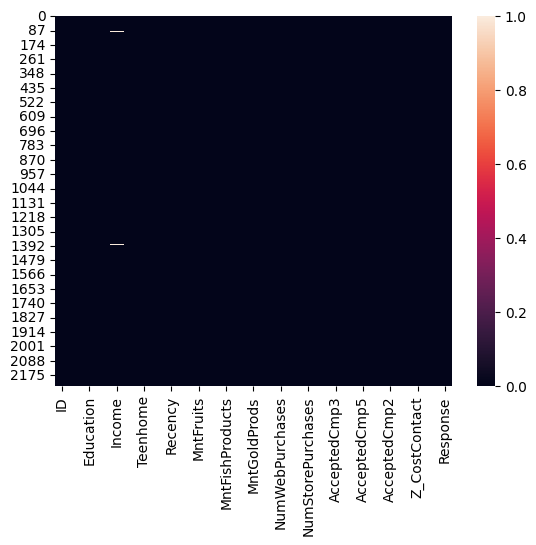

In [17]:
sns.heatmap(data.isnull())

In [18]:
# In this we have only one cloumn that have null values i.e Income

In [19]:
# Replacing null values with median cause the data is skewed which means there are outliers in the data
data['Income'].fillna(data['Income'].median(), inplace = True)

In [20]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

<Axes: >

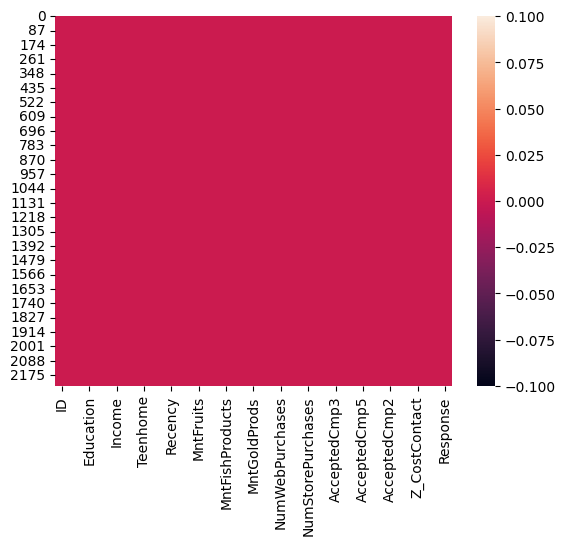

In [21]:
sns.heatmap(data.isnull())

In [22]:
# We have filled our null values here

### Treating Duplicate values

In [23]:
data[data.duplicated]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [24]:
data.duplicated().sum()

0

## Here we have cleaned our data by treating null values and duplicate values

In [25]:
# Checking unique values present in each coumns in the data set

In [26]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Here we can see that Z_CostContact and Z_Revenue have same value for each record so we can drop this as they are not going to contribute anything in the model building

In [27]:
data = data.drop(columns=['Z_CostContact' , 'Z_Revenue'],axis=1)

In [28]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


In [29]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [30]:
# Converting Year_Birth column into age
current_year = 2024

#Calculate the age based on the birth year and the current year
data['age'] = current_year - data['Year_Birth']

#Drop the original birth year column
data.drop(columns=['Year_Birth'],inplace=True)

#Save the modified dataset to a csv file
data.to_csv('Marketing_campaign_md.csv',index=False)
data

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,67
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,70
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,59
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,40
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,4,5,0,0,0,0,0,0,0,57
2236,4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,5,7,0,0,0,1,0,0,0,78
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,13,6,0,1,0,0,0,0,0,43
2238,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,10,3,0,0,0,0,0,0,0,68


# Working on Categorical Column

In [31]:
data_types = data.dtypes
print(data_types)

ID                              int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response                        int64
age         

In [32]:
# Through this we can differentiate the categorigal and numerical columns in the data set

In [33]:
# We have 2 categorical columns i.e Education and Marital_Status

In [34]:
# Visualization of Categorical Columns

Text(0.5, 1.0, 'Education Distribution')

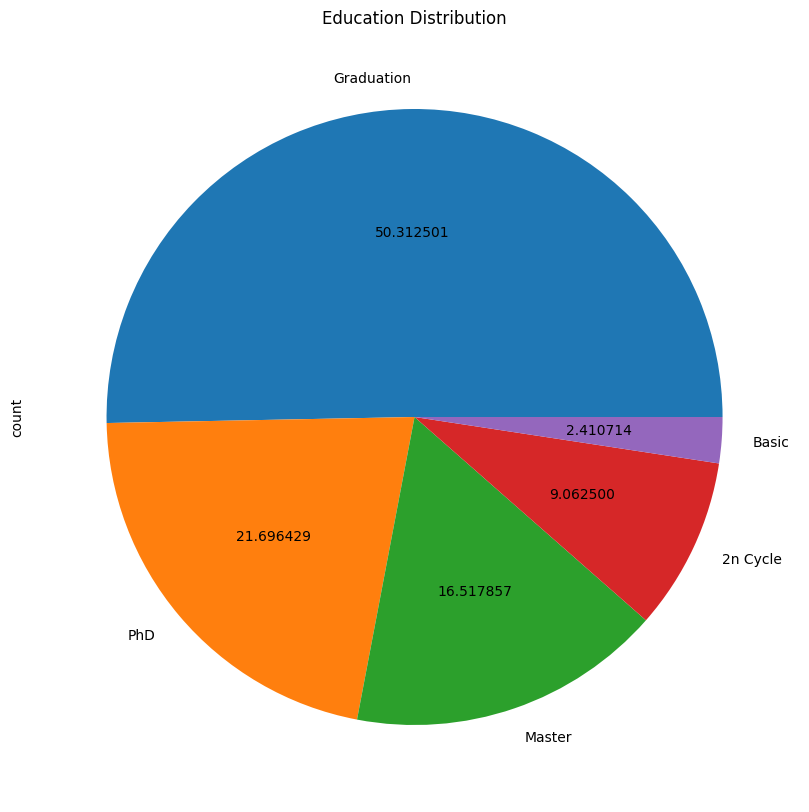

In [35]:
plt.figure(figsize=(25,10))
data['Education'].value_counts().plot(kind='pie',autopct='%2f')
plt.title('Education Distribution')

In [36]:
# Count of education level

In [37]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Marital_Status'>

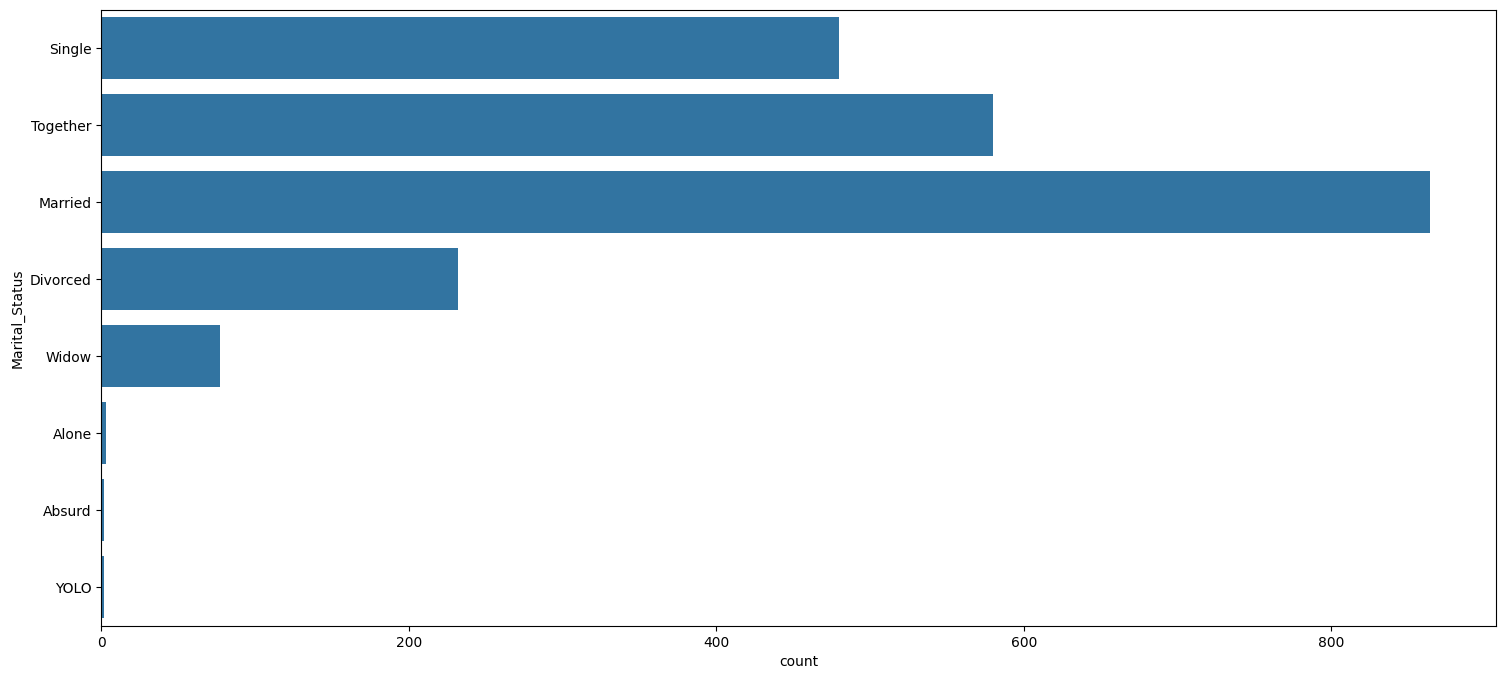

In [38]:
plt.figure(figsize=(18,8))
sns.countplot(data['Marital_Status'])

In [39]:
# Count of Marital_Status

In [40]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

# Working on Numerical Column

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64


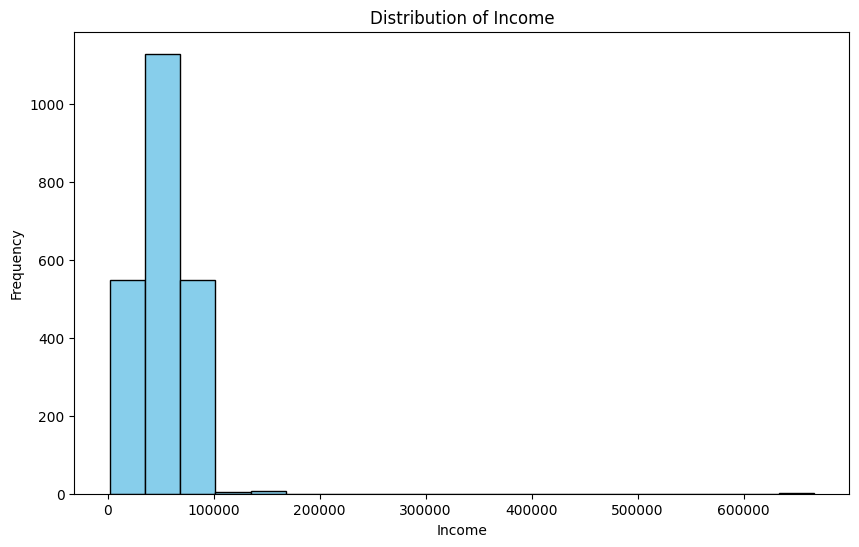

6.800947406327349

In [41]:
#Check the summary Statistics of the 'Income' column
print(data['Income'].describe())

#create a histogram to visualize to disrtibution of 'Income'
plt.figure(figsize=(10, 6))
plt.hist(data['Income'], bins=20, color='skyblue',edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()
data['Income'].skew()

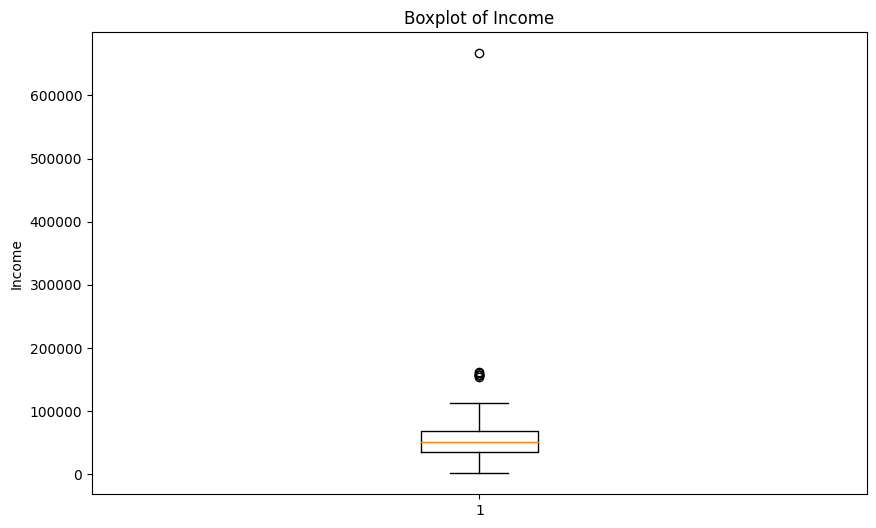

In [42]:
plt.figure(figsize=(10, 6))
box1=plt.boxplot(data['Income'])
plt.title('Boxplot of Income')
plt.ylabel('Income')
plt.show()

## Treatment of Outliers

In [43]:
outlier = [item.get_ydata() for item in box1['fliers']]

In [44]:
data[data['Income'].isin(outlier[0])]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
164,8475,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,...,0,0,0,0,0,0,0,0,0,51
617,1503,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,...,1,1,0,0,0,0,0,0,0,48
655,5555,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,...,0,0,0,0,0,0,0,0,0,49
687,1501,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,...,1,0,0,0,0,0,0,0,0,42
1300,5336,Master,Together,157733.0,1,0,2013-06-04,37,39,1,...,1,1,0,0,0,0,0,0,0,53
1653,4931,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,...,0,1,0,0,0,0,0,0,0,47
2132,11181,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,...,0,0,0,0,0,0,0,0,0,75
2233,9432,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,...,3,6,0,0,0,0,0,0,0,47


In [45]:
from scipy.stats.mstats import winsorize

In [46]:
winsorized_data = winsorize(data['Income'], limits=[0.05, 0.05])  # Winsorize at the 5th and 95th percentiles

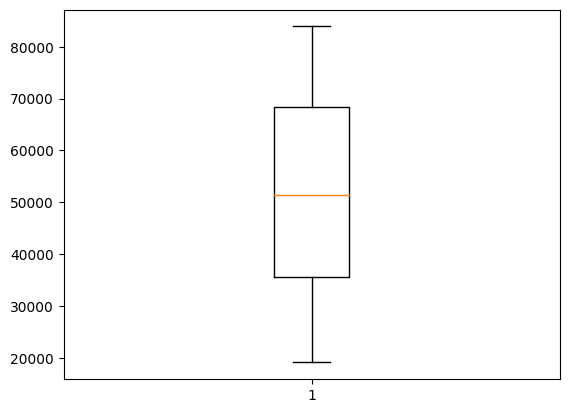

In [47]:
data['Income']=winsorized_data
plt.boxplot(data['Income'])
plt.show()

In [48]:
data['Income'].skew()

0.009479854682232412

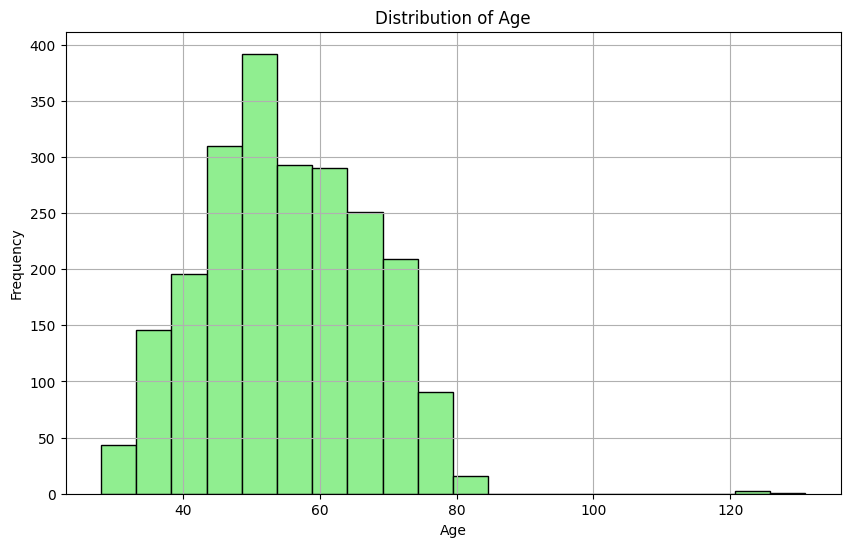

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [50]:
data['age'].skew()

0.34994385918267057

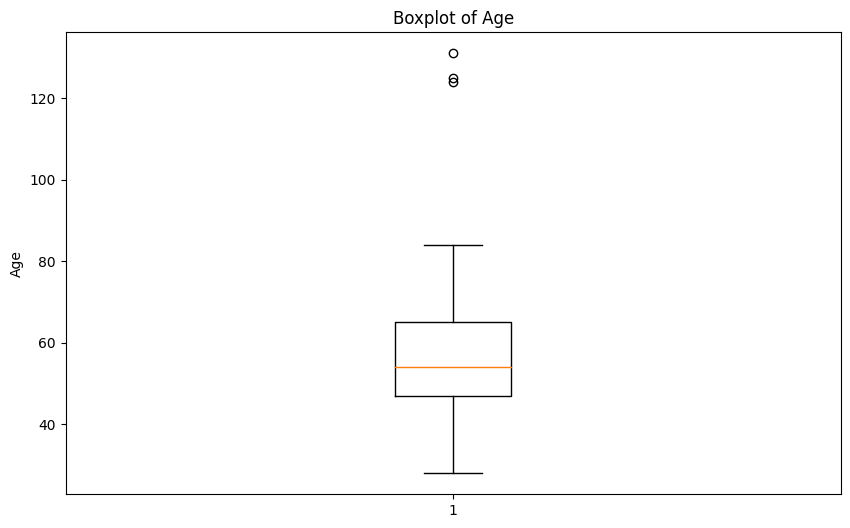

In [51]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In [52]:
# Since we have only few outliers we will use kill method

In [53]:
q3 =data['age'].quantile(0.75)

In [54]:
q1=data['age'].quantile(0.25)

In [55]:
q3 + 1.5*(q3-q1)

92.0

In [56]:
data = data[data['age'] <= 90].dropna(subset=['age'])

In [57]:
data['age'].skew()

0.09326627359499409

In [58]:
data.isnull().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
age                    0
dtype: int64

In [59]:
data.shape

(2237, 27)

# Outlires detection for other columns

In [60]:
columns_to_remove_outliers = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','MntWines', 'MntFruits',
                              'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']

# Copy the original DataFrame to avoid modifying the original
data_no_outliers = data.copy()

#Loop through selected columns and remove outliers using IQR method
for column in columns_to_remove_outliers:
    Q1 = data_no_outliers[column].quantile(0.25)
    Q3 = data_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data_no_outliers[(data_no_outliers[column] >= lower_bound) & (data_no_outliers[column] <= upper_bound)]

#Print the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", data_no_outliers.shape)

Shape of DataFrame after removing outliers: (1205, 27)


In [61]:
from scipy.stats import zscore

#Select columns for outlier removal
columns_to_remove_outliers = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits',
                              'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

#Calculate z-scores for selected columns
z_scores = zscore(data[columns_to_remove_outliers])

# Define a threshold for z-scores (e.g., 3 or -3, based on your preference)
z_score_threshold = 3

#Remove rows with outliers based on z-scores
data_no_outliers = data[(abs(z_scores) < z_score_threshold).all(axis=1)]

#Print the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", data_no_outliers.shape)
data=data_no_outliers
data=data.reset_index(drop=True)
data

Shape of DataFrame after removing outliers: (1988, 27)


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,67
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,70
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,59
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,40
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,8372,Graduation,Married,34421.0,1,0,2013-07-01,81,3,3,...,2,7,0,0,0,0,0,0,0,50
1984,4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,5,7,0,0,0,1,0,0,0,78
1985,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,13,6,0,1,0,0,0,0,0,43
1986,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,10,3,0,0,0,0,0,0,0,68


### Corelation analysis

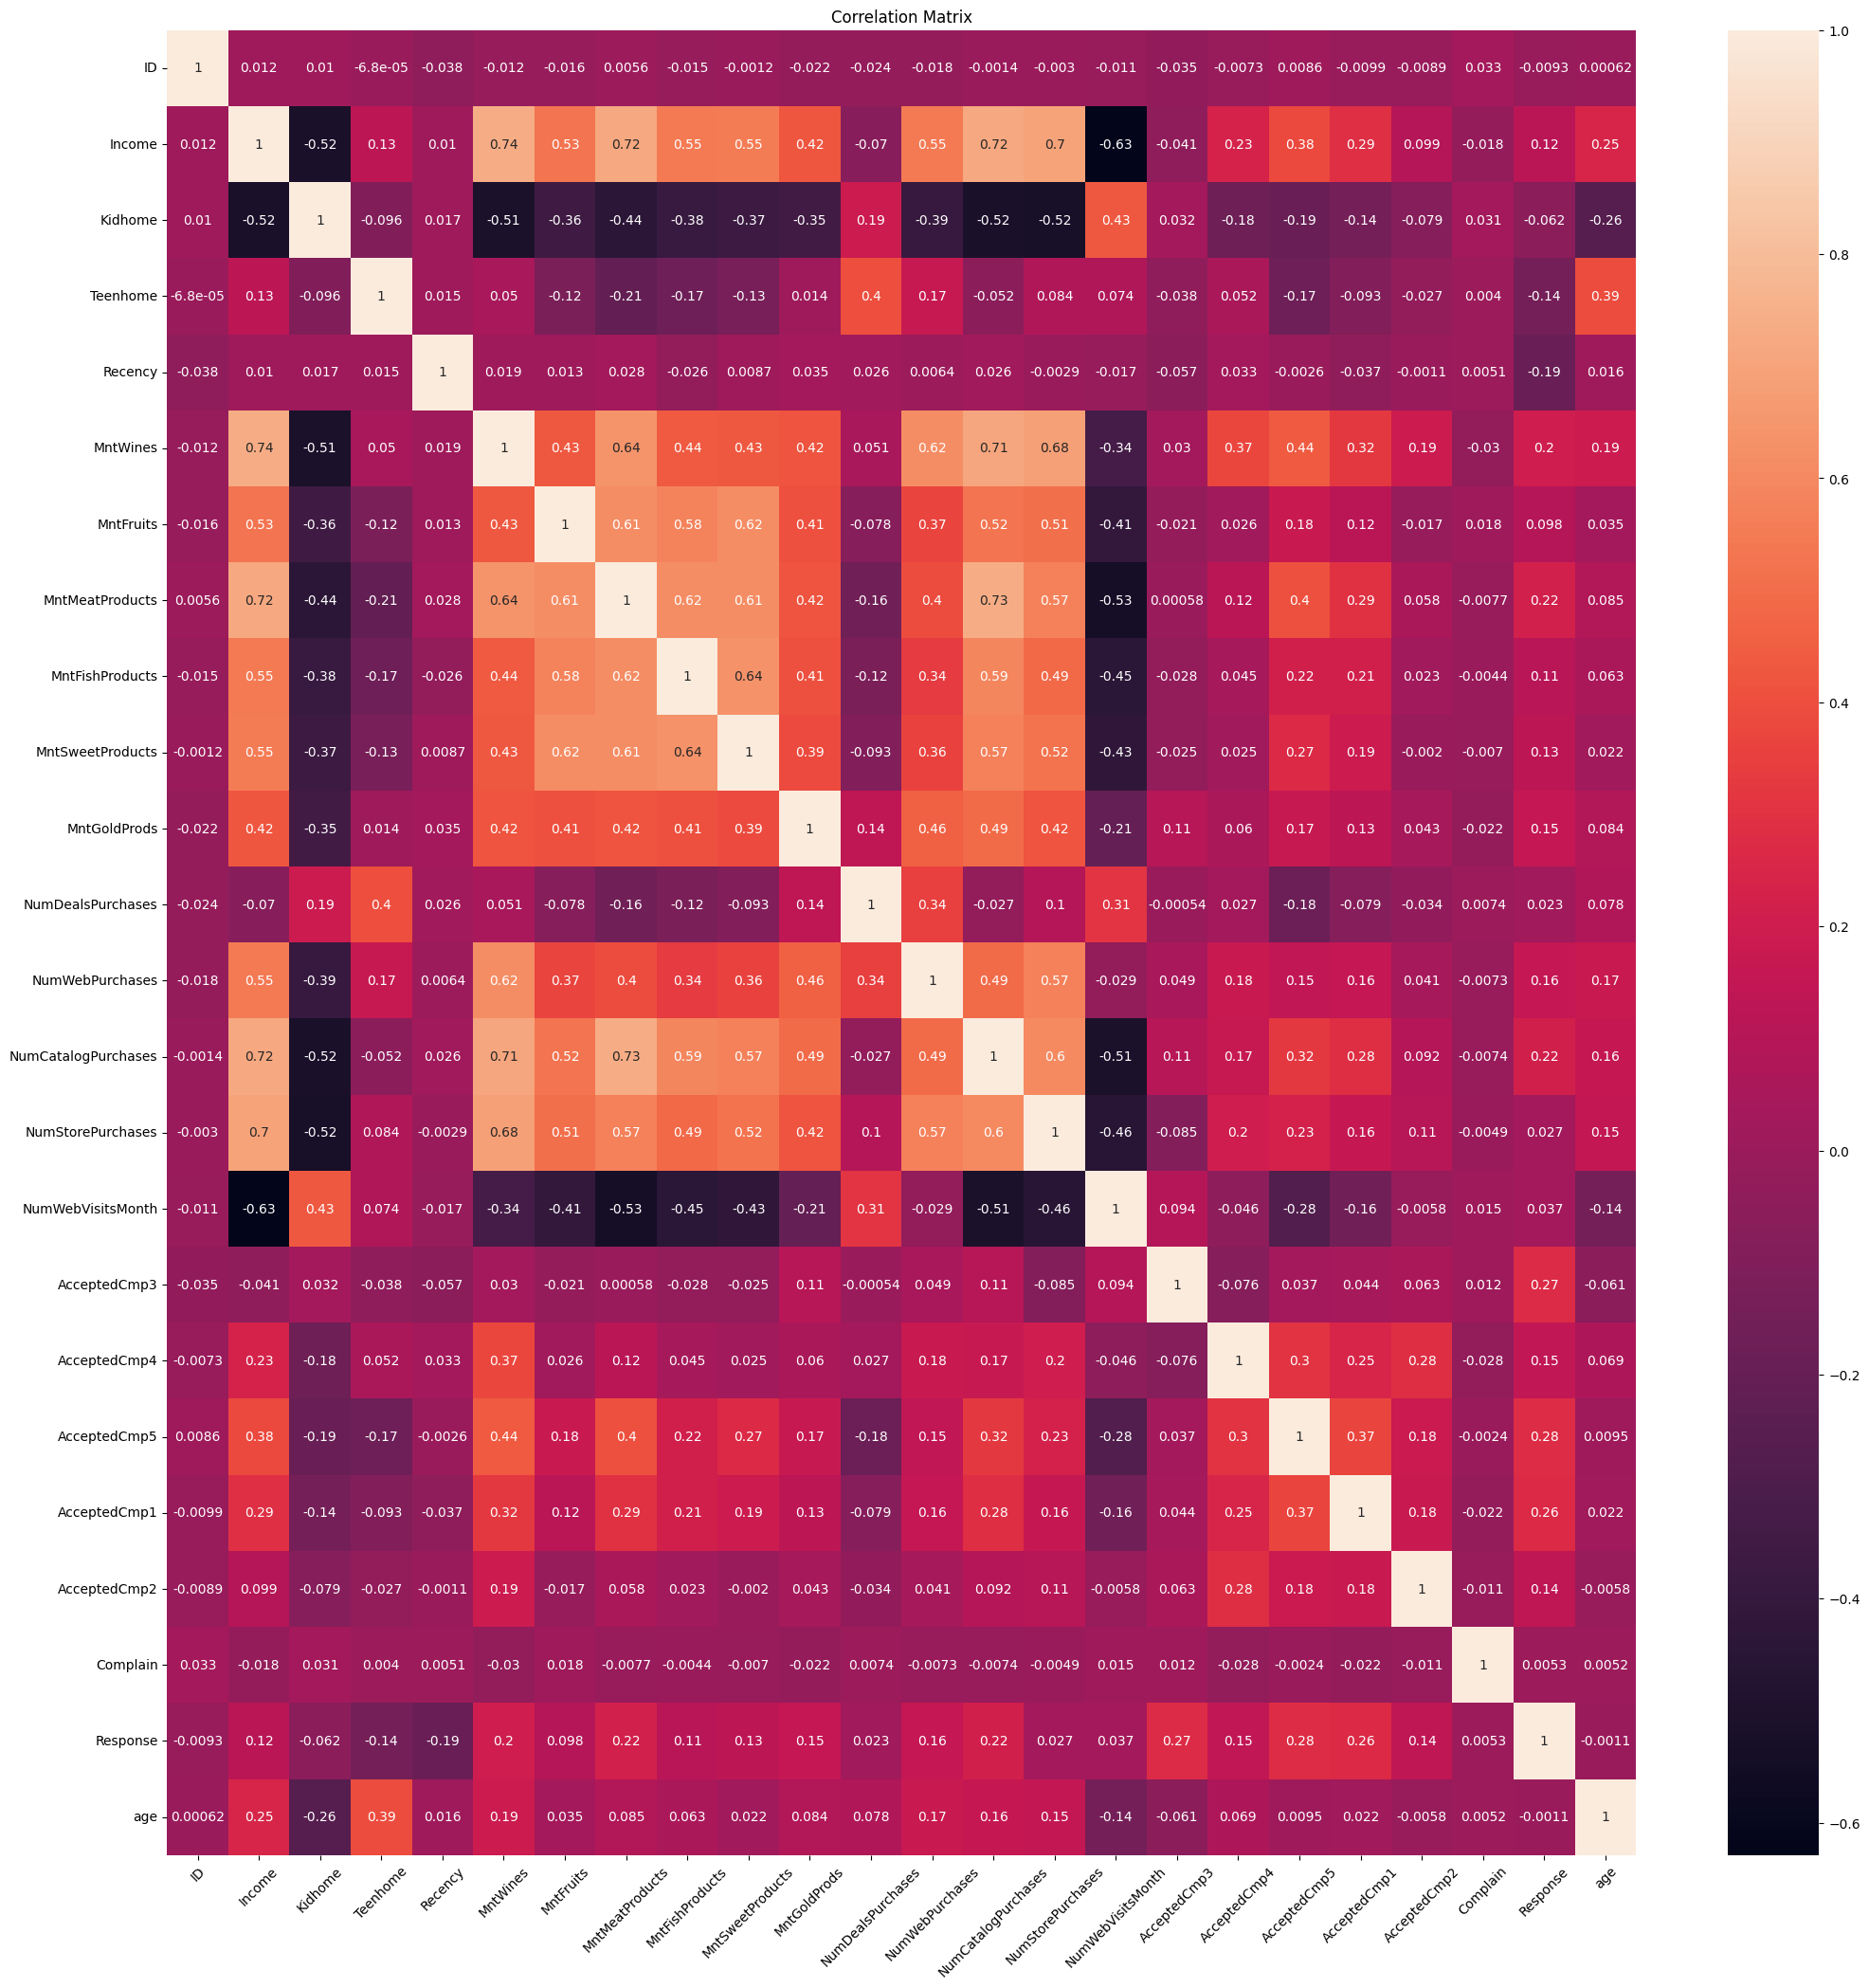

In [62]:
#Identify numeric columns for correlation analysis\
numaric_columns = data.select_dtypes(include=['int64','float64']).columns

#Calculate correlation matrix
correlaion_matrix = data[numaric_columns].corr()

#Visualize correlation matrix using a heatmap
#Adjust figure sixe and rotation of trick label
plt.figure(figsize=(25,25))
sns.heatmap(correlaion_matrix,annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()

In [63]:
numaric_columns = data.select_dtypes(include=['int64','float64']).columns
correlaion_matrix = data[numaric_columns].corr()
correlaion_matrix

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
ID,1.000000,0.012114,0.010440,-0.000068,-0.038421,-0.012032,-0.015669,0.005637,-0.015385,-0.001153,...,-0.003022,-0.011103,-0.035303,-0.007280,0.008615,-0.009908,-0.008859,0.033135,-0.009281,0.000615
Income,0.012114,1.000000,-0.519056,0.130326,0.010203,0.736251,0.526913,0.715289,0.546929,0.550842,...,0.698645,-0.628829,-0.040801,0.234020,0.382745,0.287869,0.099267,-0.018278,0.117706,0.246856
Kidhome,0.010440,-0.519056,1.000000,-0.095965,0.016791,-0.508715,-0.360155,-0.443498,-0.384176,-0.372753,...,-0.521433,0.433572,0.032386,-0.176258,-0.185974,-0.140880,-0.078506,0.031005,-0.062306,-0.263670
Teenhome,-0.000068,0.130326,-0.095965,1.000000,0.014561,0.049762,-0.119026,-0.210633,-0.166963,-0.132167,...,0.083585,0.074028,-0.037795,0.052372,-0.170395,-0.093262,-0.027240,0.004049,-0.139043,0.393693
Recency,-0.038421,0.010203,0.016791,0.014561,1.000000,0.019380,0.013224,0.028358,-0.025594,0.008743,...,-0.002889,-0.016780,-0.056823,0.032873,-0.002644,-0.037485,-0.001114,0.005052,-0.185253,0.015885
MntWines,-0.012032,0.736251,-0.508715,0.049762,0.019380,1.000000,0.432441,0.641378,0.435085,0.429853,...,0.683719,-0.335736,0.030356,0.373630,0.436331,0.322830,0.185786,-0.029811,0.203209,0.186268
MntFruits,-0.015669,0.526913,-0.360155,-0.119026,0.013224,0.432441,1.000000,0.613018,0.575652,0.617572,...,0.509831,-0.406255,-0.021026,0.026214,0.179130,0.119866,-0.016654,0.018430,0.098248,0.034516
MntMeatProducts,0.005637,0.715289,-0.443498,-0.210633,0.028358,0.641378,0.613018,1.000000,0.616638,0.614066,...,0.572167,-0.534107,0.000580,0.118218,0.404862,0.294461,0.058060,-0.007708,0.219619,0.085218
MntFishProducts,-0.015385,0.546929,-0.384176,-0.166963,-0.025594,0.435085,0.575652,0.616638,1.000000,0.635122,...,0.487832,-0.450124,-0.028333,0.045360,0.216592,0.211146,0.023116,-0.004389,0.114649,0.063449
MntSweetProducts,-0.001153,0.550842,-0.372753,-0.132167,0.008743,0.429853,0.617572,0.614066,0.635122,1.000000,...,0.517987,-0.425148,-0.025234,0.025031,0.266272,0.190896,-0.002038,-0.006963,0.129993,0.021829


# Visualization of kids and teen in the family

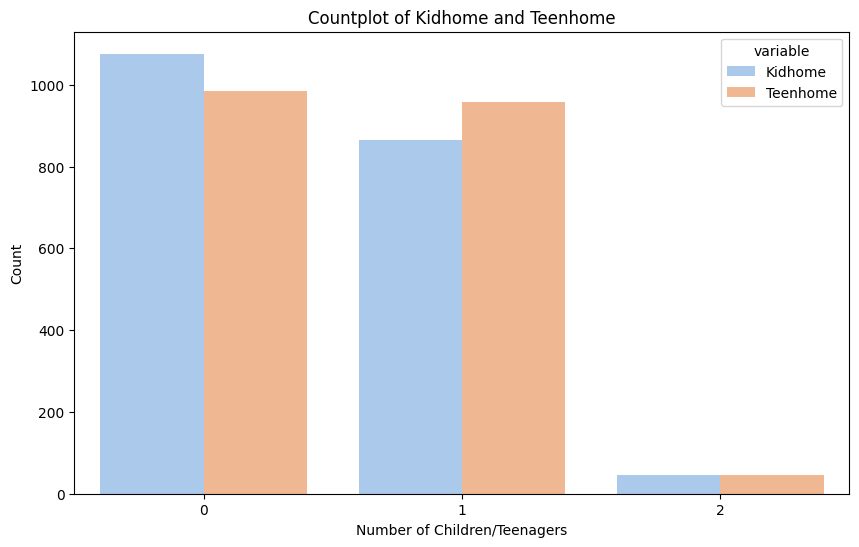

In [64]:
family_columns = ['Kidhome', 'Teenhome']

# Countplot to visualize the distribution of Kidhome and Teenhome
plt.figure(figsize=(10, 6))
sns.countplot(data=pd.melt(data[family_columns]), x='value', hue='variable', palette='pastel')
plt.title('Countplot of Kidhome and Teenhome')
plt.xlabel('Number of Children/Teenagers')
plt.ylabel('Count')
plt.show()

# Visualization for product


Text(0, 0.5, 'Total Spending')

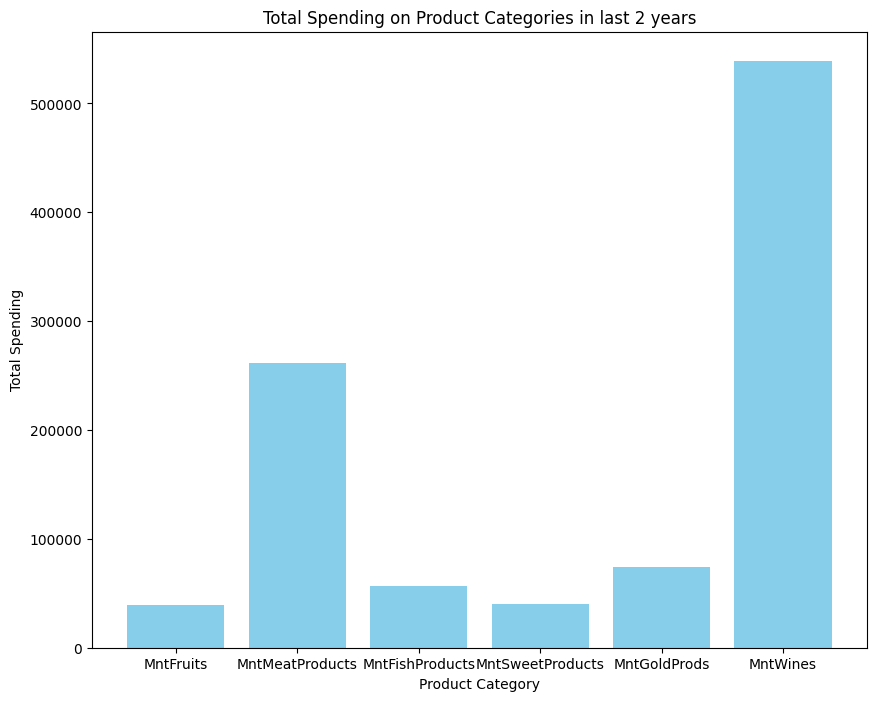

In [65]:
# Visualization 1: Spending on different product categories
plt.figure(figsize=(10, 8))
product_categories = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntWines']
product_spending = data[product_categories].sum()

plt.bar(product_categories, product_spending, color='skyblue')
plt.title('Total Spending on Product Categories in last 2 years')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')


# Visualizations for purchases through different channels

Text(0, 0.5, 'Total Number of Purchases')

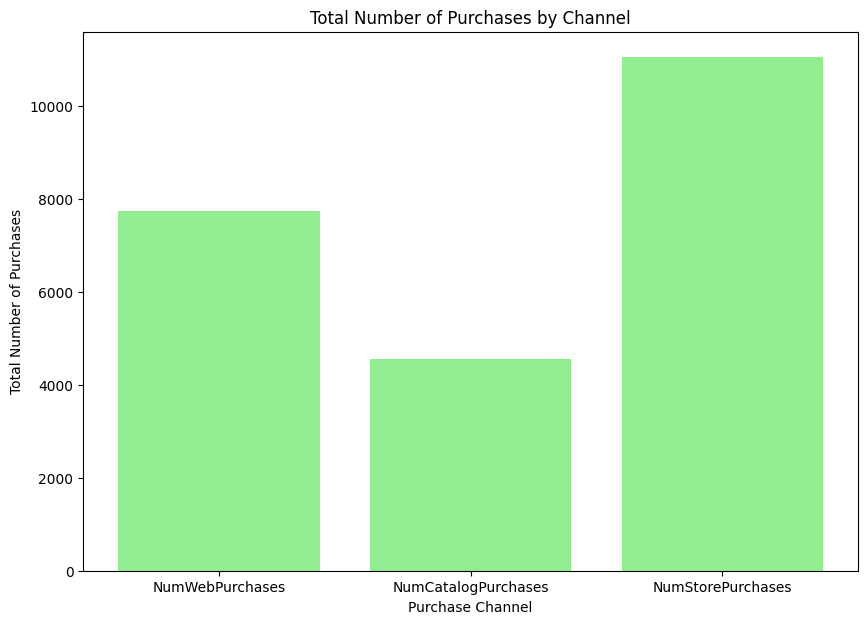

In [66]:
plt.figure(figsize=(10, 7))
purchase_channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
num_purchases = data[purchase_channels].sum()

plt.bar(purchase_channels, num_purchases, color='lightgreen')
plt.title('Total Number of Purchases by Channel')
plt.xlabel('Purchase Channel')
plt.ylabel('Total Number of Purchases')

# Visualization for Response

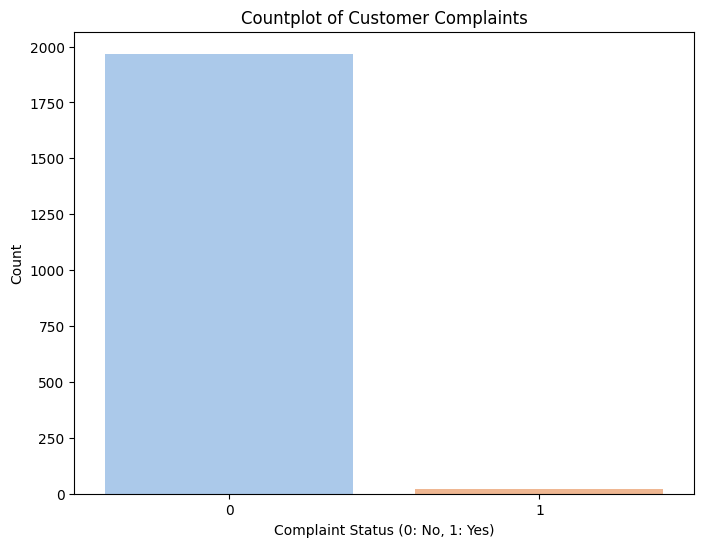

Percentage of customers with complaints: 1.01%


In [67]:
#Countplot to visualize the distribution of complaints
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Complain', palette='pastel')
plt.title('Countplot of Customer Complaints')
plt.xlabel('Complaint Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

#Percentage of customers with complaints
complaint_percentage = data['Complain'].mean() * 100
print(f"Percentage of customers with complaints: {complaint_percentage:.2f}%")

# Visualization for camaign acceptance analysis

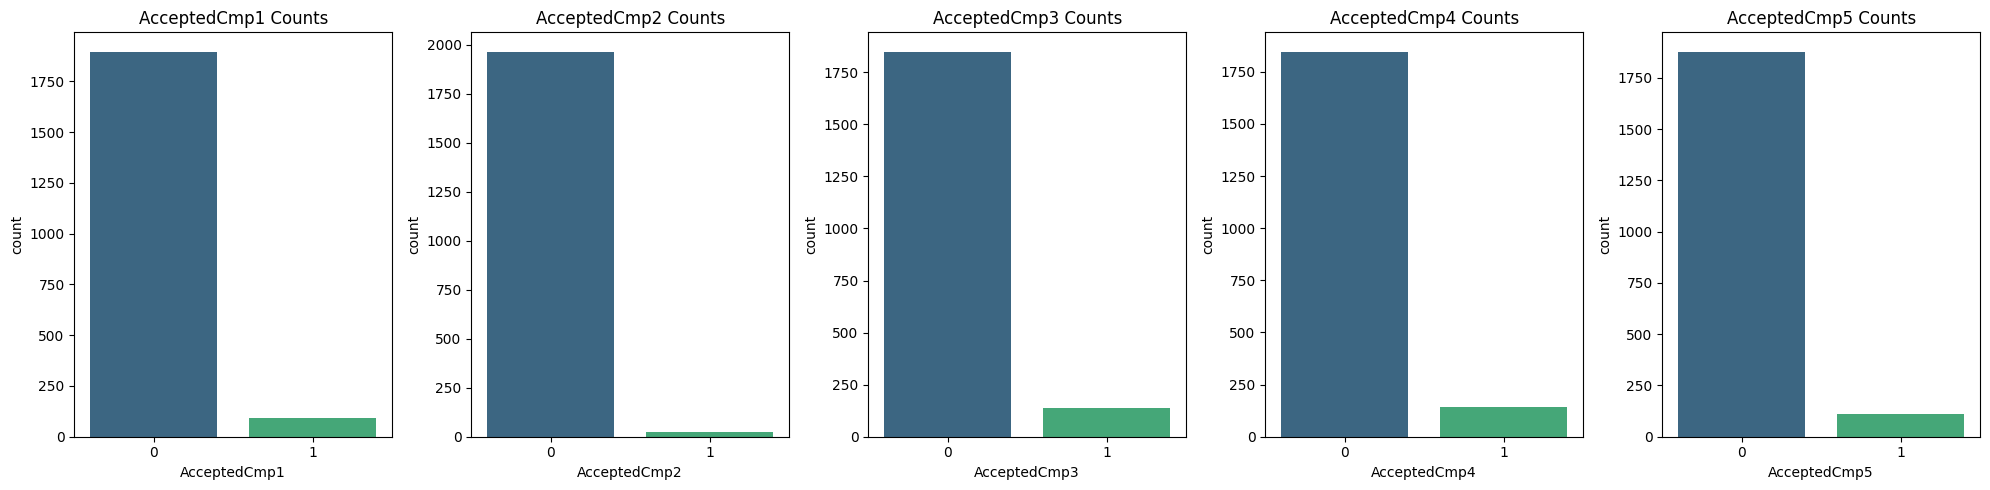

In [68]:
#Selecting relevant columns for campaign acceptance analysis
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

#Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

#Plot bar plots for each campaign
for col, ax in zip(campaign_columns, axes.flatten()):
    sns.countplot(x=col, data=data, ax=ax, palette='viridis')
    ax.set_title(f'{col} Counts')

plt.tight_layout ()
plt.show()

# Feature Enginerring

In [69]:
#Deriving living situation by marital status"Alone"
#we will 5 values in to 2 unique values which is alone and or having partner
data["Living_With"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Segmenting education levels in three groups
#we will convert different categories in Undergraduate, Graduate Postgraduate
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Droping the original Marital status column
data.drop(columns = ["Marital_Status"],inplace = True)
data

,ID,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Living_With
0,5524,Graduate,58138.0,0,0,2012-09-04,58,635,88,546,...,7,0,0,0,0,0,0,1,67,Alone
1,2174,Graduate,46344.0,1,1,2014-03-08,38,11,1,6,...,5,0,0,0,0,0,0,0,70,Alone
2,4141,Graduate,71613.0,0,0,2013-08-21,26,426,49,127,...,4,0,0,0,0,0,0,0,59,Partner
3,6182,Graduate,26646.0,1,0,2014-02-10,26,11,4,20,...,6,0,0,0,0,0,0,0,40,Partner
4,5324,Postgraduate,58293.0,1,0,2014-01-19,94,173,43,118,...,5,0,0,0,0,0,0,0,43,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,8372,Graduate,34421.0,1,0,2013-07-01,81,3,3,7,...,7,0,0,0,0,0,0,0,50,Partner
1984,4001,Postgraduate,64014.0,2,1,2014-06-10,56,406,0,30,...,7,0,0,0,1,0,0,0,78,Partner
1985,7270,Graduate,56981.0,0,0,2014-01-25,91,908,48,217,...,6,0,1,0,0,0,0,0,43,Alone
1986,8235,Postgraduate,69245.0,0,1,2014-01-24,8,428,30,214,...,3,0,0,0,0,0,0,0,68,Partner


In [70]:
import datetime
#Created a feature "Customer_For"
def get_different_year():
    registration_year = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)
    current_year = datetime.datetime.now().year
    return current_year - registration_year

data['Years_Since_Registration'] = get_different_year()  # Number of years since customer registration
data["Years_Since_Registration"] = pd.to_numeric(data["Years_Since_Registration"], errors="coerce")
data["Years_Since_Registration"]

#Droping the original Marital status column
data.drop(columns = ["Dt_Customer"],inplace = True)
data

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Living_With,Years_Since_Registration
0,5524,Graduate,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,67,Alone,12
1,2174,Graduate,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,70,Alone,10
2,4141,Graduate,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,59,Partner,11
3,6182,Graduate,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,40,Partner,10
4,5324,Postgraduate,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,43,Partner,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,8372,Graduate,34421.0,1,0,81,3,3,7,6,...,0,0,0,0,0,0,0,50,Partner,11
1984,4001,Postgraduate,64014.0,2,1,56,406,0,30,0,...,0,0,0,1,0,0,0,78,Partner,10
1985,7270,Graduate,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,0,43,Alone,10
1986,8235,Postgraduate,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,0,68,Partner,10


In [71]:
#customer Total Spending on products
data["Customer_Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

#Customer Total Purchases
data["Total_purcheses"] = data["NumDealsPurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]

#Number of Children
data["Num_Children"] = data["Kidhome"] + data["Teenhome"]

#Accenpted Campaigns Total
data["Total_Accept_cmp"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]
data

,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp
0,5524,Graduate,58138.0,0,0,58,635,88,546,172,...,0,0,1,67,Alone,12,1617,25,0,0
1,2174,Graduate,46344.0,1,1,38,11,1,6,2,...,0,0,0,70,Alone,10,27,6,2,0
2,4141,Graduate,71613.0,0,0,26,426,49,127,111,...,0,0,0,59,Partner,11,776,21,0,0
3,6182,Graduate,26646.0,1,0,26,11,4,20,10,...,0,0,0,40,Partner,10,53,8,1,0
4,5324,Postgraduate,58293.0,1,0,94,173,43,118,46,...,0,0,0,43,Partner,10,422,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,8372,Graduate,34421.0,1,0,81,3,3,7,6,...,0,0,0,50,Partner,11,30,4,1,0
1984,4001,Postgraduate,64014.0,2,1,56,406,0,30,0,...,0,0,0,78,Partner,10,444,22,3,1
1985,7270,Graduate,56981.0,0,0,91,908,48,217,32,...,0,0,0,43,Alone,10,1241,19,0,1
1986,8235,Postgraduate,69245.0,0,1,8,428,30,214,80,...,0,0,0,68,Partner,10,843,23,1,0


In [72]:
#Droping the original column of which we did feature enginerring
data = data.drop(columns=["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases",
                        "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","Kidhome","Teenhome","AcceptedCmp1","AcceptedCmp2",
                        "AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"],axis=1)
data

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp
0,5524,Graduate,58138.0,58,7,0,1,67,Alone,12,1617,25,0,0
1,2174,Graduate,46344.0,38,5,0,0,70,Alone,10,27,6,2,0
2,4141,Graduate,71613.0,26,4,0,0,59,Partner,11,776,21,0,0
3,6182,Graduate,26646.0,26,6,0,0,40,Partner,10,53,8,1,0
4,5324,Postgraduate,58293.0,94,5,0,0,43,Partner,10,422,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,8372,Graduate,34421.0,81,7,0,0,50,Partner,11,30,4,1,0
1984,4001,Postgraduate,64014.0,56,7,0,0,78,Partner,10,444,22,3,1
1985,7270,Graduate,56981.0,91,6,0,0,43,Alone,10,1241,19,0,1
1986,8235,Postgraduate,69245.0,8,3,0,0,68,Partner,10,843,23,1,0


In [73]:
data.shape

(1988, 14)

In [74]:
# Initially we had 29 coluumns now its 14

In [75]:
data

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp
0,5524,Graduate,58138.0,58,7,0,1,67,Alone,12,1617,25,0,0
1,2174,Graduate,46344.0,38,5,0,0,70,Alone,10,27,6,2,0
2,4141,Graduate,71613.0,26,4,0,0,59,Partner,11,776,21,0,0
3,6182,Graduate,26646.0,26,6,0,0,40,Partner,10,53,8,1,0
4,5324,Postgraduate,58293.0,94,5,0,0,43,Partner,10,422,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,8372,Graduate,34421.0,81,7,0,0,50,Partner,11,30,4,1,0
1984,4001,Postgraduate,64014.0,56,7,0,0,78,Partner,10,444,22,3,1
1985,7270,Graduate,56981.0,91,6,0,0,43,Alone,10,1241,19,0,1
1986,8235,Postgraduate,69245.0,8,3,0,0,68,Partner,10,843,23,1,0


# Label Encoding

In [76]:
from sklearn.preprocessing import LabelEncoder as le

In [77]:
#Apply Lebel Encoding to 'Living_With' And 'Education'
data['Living_With'] = le().fit_transform(data['Living_With'])
data['Education'] = le().fit_transform(data['Education'])


In [78]:
data

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp
0,5524,0,58138.0,58,7,0,1,67,0,12,1617,25,0,0
1,2174,0,46344.0,38,5,0,0,70,0,10,27,6,2,0
2,4141,0,71613.0,26,4,0,0,59,1,11,776,21,0,0
3,6182,0,26646.0,26,6,0,0,40,1,10,53,8,1,0
4,5324,1,58293.0,94,5,0,0,43,1,10,422,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,8372,0,34421.0,81,7,0,0,50,1,11,30,4,1,0
1984,4001,1,64014.0,56,7,0,0,78,1,10,444,22,3,1
1985,7270,0,56981.0,91,6,0,0,43,0,10,1241,19,0,1
1986,8235,1,69245.0,8,3,0,0,68,1,10,843,23,1,0


# Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

# Convert the scaled data back into a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)


In [80]:
scaled_data

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp
0,-0.023796,-0.915888,0.466887,0.300399,0.654528,-0.10081,2.561042,1.029554,-1.363976,1.536621,2.057087,1.469068,-1.380836,-0.416598
1,-1.056519,-0.915888,-0.158453,-0.390038,-0.225554,-0.10081,-0.390466,1.288135,-1.363976,-1.404932,-0.892933,-1.072364,1.351969,-0.416598
2,-0.450141,-0.915888,1.181357,-0.804301,-0.665595,-0.10081,-0.390466,0.340005,0.733151,0.065845,0.496730,0.934030,-1.380836,-0.416598
3,0.179049,-0.915888,-1.202878,-0.804301,0.214487,-0.10081,-0.390466,-1.297673,0.733151,-1.404932,-0.844694,-0.804845,-0.014434,-0.416598
4,-0.085451,0.554859,0.475105,1.543187,-0.225554,-0.10081,-0.390466,-1.039092,0.733151,-1.404932,-0.160067,0.666510,-0.014434,-0.416598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0.854173,-0.915888,-0.790633,1.094403,0.654528,-0.10081,-0.390466,-0.435737,0.733151,0.065845,-0.887367,-1.339884,-0.014434,-0.416598
1984,-0.493299,0.554859,0.778443,0.231356,0.654528,-0.10081,-0.390466,1.977683,0.733151,-1.404932,-0.119249,1.067789,2.718371,1.226649
1985,0.514453,-0.915888,0.405540,1.439622,0.214487,-0.10081,-0.390466,-1.039092,-1.363976,-1.404932,1.359472,0.666510,-1.380836,1.226649
1986,0.811939,0.554859,1.055801,-1.425695,-1.105636,-0.10081,-0.390466,1.115747,0.733151,-1.404932,0.621039,1.201549,-0.014434,-0.416598


# Dimentionality reduction using PCA

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca=PCA(n_components =3)

In [83]:
pca_data=pca.fit_transform(scaled_data)

In [84]:
pca_columns = [f'PC{i+1}' for i in range(pca_data.shape[1])]
pca_data = pd.DataFrame(pca_data, columns=pca_columns)

In [85]:
pca_data

,PC1,PC2,PC3
0,2.570923,2.381351,1.635021
1,-1.275347,-1.214572,-0.199185
2,1.744409,-0.743021,0.086262
3,-1.778356,-0.527054,-1.389633
4,0.150620,-1.390959,-0.504682
...,...,...,...
1983,-1.858469,-0.433273,0.322053
1984,0.267657,-1.131109,1.093589
1985,1.656815,-0.261512,-0.778436
1986,1.649053,-1.549345,-0.628080


In [86]:
pca_data.describe()

,PC1,PC2,PC3
count,1.988000e+03,1.988000e+03,1.988000e+03
mean,1.286697e-16,6.076070e-17,1.161602e-17
std,1.848080e+00,1.220947e+00,1.105545e+00
min,-4.136099e+00,-2.612631e+00,-3.875171e+00
25%,-1.568616e+00,-8.429611e-01,-7.702678e-01
50%,-4.261540e-01,-1.873398e-01,1.235910e-02
75%,1.407386e+00,5.633259e-01,7.543177e-01
max,5.891538e+00,4.273344e+00,4.365119e+00


In [87]:
from mpl_toolkits.mplot3d import Axes3D

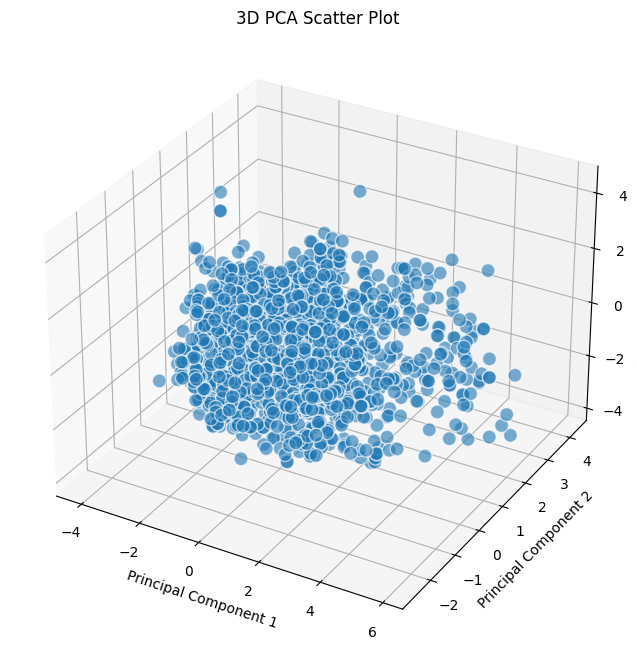

In [88]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], alpha=0.6, edgecolors='w', s=100)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Scatter Plot')

plt.show()

# Clustering

## 1] DBSCAN Clustering

In [89]:
pca_data

,PC1,PC2,PC3
0,2.570923,2.381351,1.635021
1,-1.275347,-1.214572,-0.199185
2,1.744409,-0.743021,0.086262
3,-1.778356,-0.527054,-1.389633
4,0.150620,-1.390959,-0.504682
...,...,...,...
1983,-1.858469,-0.433273,0.322053
1984,0.267657,-1.131109,1.093589
1985,1.656815,-0.261512,-0.778436
1986,1.649053,-1.549345,-0.628080


In [90]:
pca_data.isnull().sum()

PC1    0
PC2    0
PC3    0
dtype: int64

In [91]:
from sklearn.cluster import DBSCAN

In [92]:
dbscan=DBSCAN(eps=2,min_samples=100)

In [93]:
dbscan_labels=dbscan.fit_predict(pca_data)

In [94]:
# Adding Cluster to the datadrame
pca_data['Cluster']=dbscan_labels

In [95]:
pca_data

,PC1,PC2,PC3,Cluster
0,2.570923,2.381351,1.635021,0
1,-1.275347,-1.214572,-0.199185,0
2,1.744409,-0.743021,0.086262,0
3,-1.778356,-0.527054,-1.389633,0
4,0.150620,-1.390959,-0.504682,0
...,...,...,...,...
1983,-1.858469,-0.433273,0.322053,0
1984,0.267657,-1.131109,1.093589,0
1985,1.656815,-0.261512,-0.778436,0
1986,1.649053,-1.549345,-0.628080,0


In [96]:
pca_data['Cluster'].value_counts()

Cluster
 0    1974
-1      14
Name: count, dtype: int64

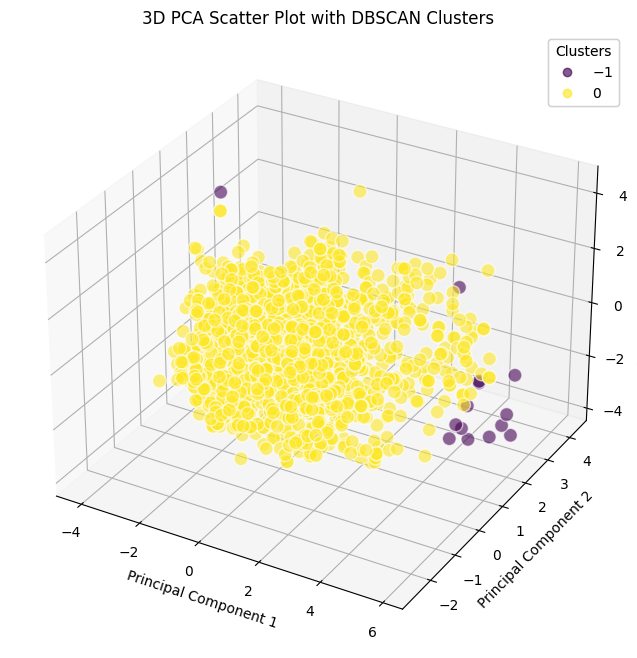

In [97]:
# Plot 3D scatter plot of PCA-transformed data with DBSCAN clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot with clusters
scatter = ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['Cluster'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Scatter Plot with DBSCAN Clusters')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

In [98]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(pca_data, dbscan_labels)

# Print the silhouette score
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.49553752003219775


In [99]:
#  A silhouette score close to 1 indicates that the clusters are well-separated, while a score close to -1 suggests that the samples may have been assigned to the wrong cluster.

In [100]:
# As we can see the score is very less to 1 so we cant accept DBSCAN clustering

# HIERARCHICAL CLUSTERING

In [101]:
pca_data

,PC1,PC2,PC3,Cluster
0,2.570923,2.381351,1.635021,0
1,-1.275347,-1.214572,-0.199185,0
2,1.744409,-0.743021,0.086262,0
3,-1.778356,-0.527054,-1.389633,0
4,0.150620,-1.390959,-0.504682,0
...,...,...,...,...
1983,-1.858469,-0.433273,0.322053,0
1984,0.267657,-1.131109,1.093589,0
1985,1.656815,-0.261512,-0.778436,0
1986,1.649053,-1.549345,-0.628080,0


In [102]:
column_to_remove = 'Cluster'  # Specify the column name
pca_data = pca_data.drop(columns=[column_to_remove])

In [103]:
pca_data

,PC1,PC2,PC3
0,2.570923,2.381351,1.635021
1,-1.275347,-1.214572,-0.199185
2,1.744409,-0.743021,0.086262
3,-1.778356,-0.527054,-1.389633
4,0.150620,-1.390959,-0.504682
...,...,...,...
1983,-1.858469,-0.433273,0.322053
1984,0.267657,-1.131109,1.093589
1985,1.656815,-0.261512,-0.778436
1986,1.649053,-1.549345,-0.628080


In [104]:
import scipy.cluster.hierarchy as shc

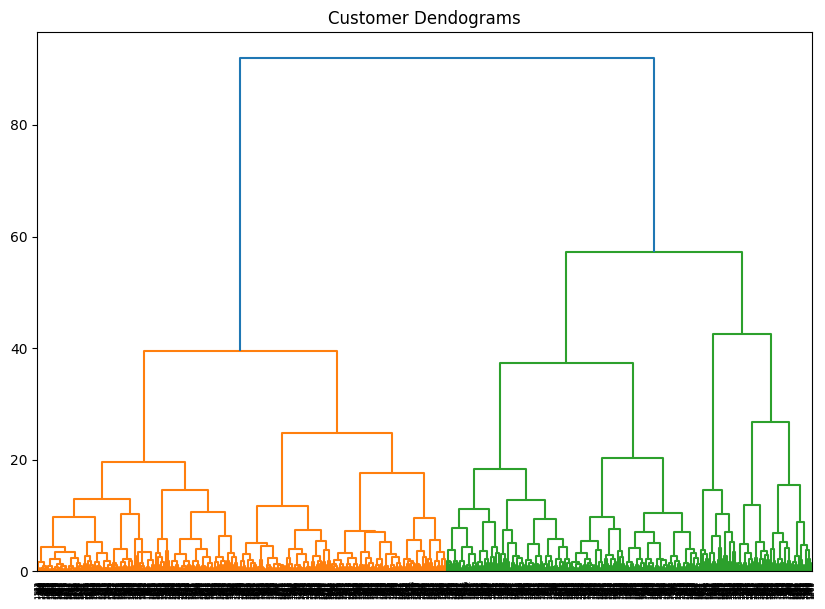

In [105]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend=shc.dendrogram(shc.linkage(pca_data,method='ward'))

In [106]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(pca_data)

In [107]:
silhouette_avg = silhouette_score(pca_data,labels)

In [108]:
silhouette_avg

0.3392961043580874

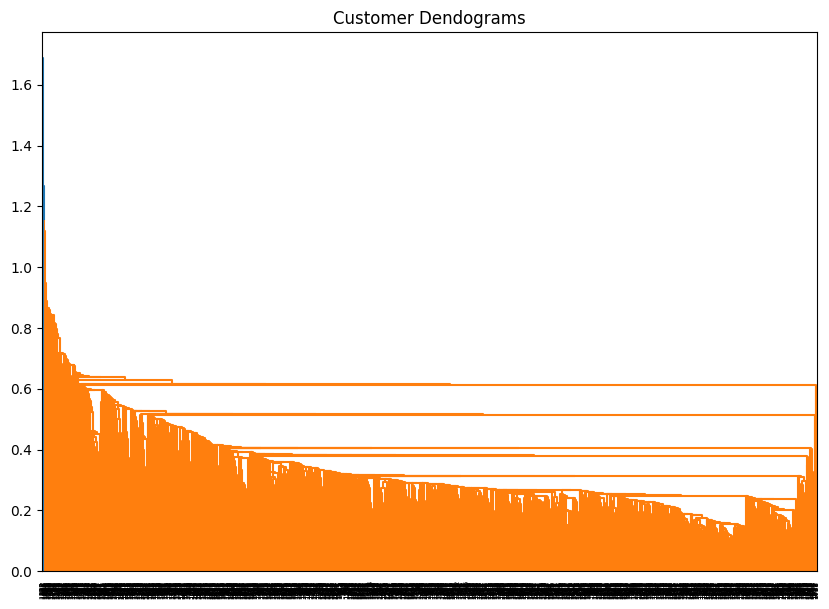

In [109]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend=shc.dendrogram(shc.linkage(pca_data,method='single'))

In [110]:
# In this we are not getting the n_cluster value so we will be using different method

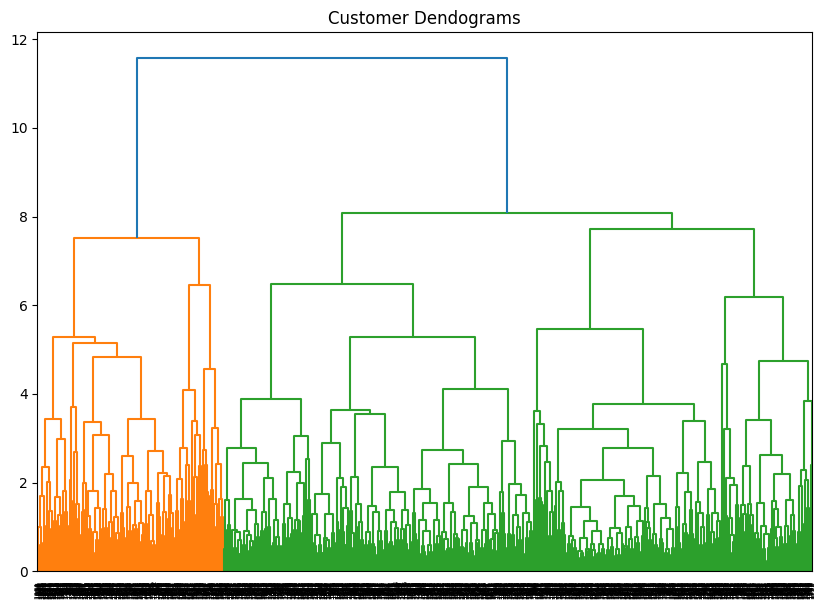

In [111]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend=shc.dendrogram(shc.linkage(pca_data,method='complete'))

In [112]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
labels=cluster.fit_predict(pca_data)

In [113]:
silhouette_avg = silhouette_score(pca_data,labels)

In [114]:
silhouette_avg

0.18393175486332825

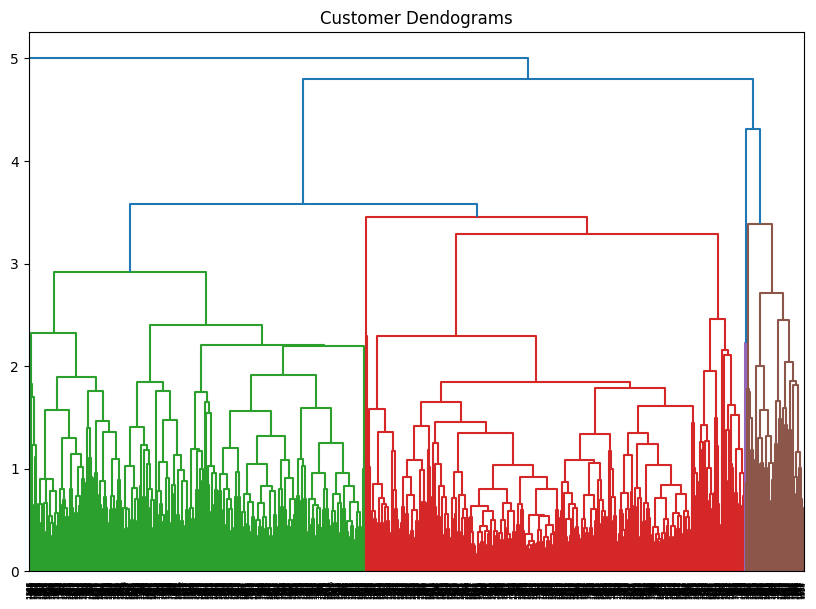

In [115]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend=shc.dendrogram(shc.linkage(pca_data,method='average'))

In [116]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
labels=cluster.fit_predict(pca_data)

In [117]:
silhouette_avg = silhouette_score(pca_data,labels)

In [118]:
silhouette_avg

0.2882908482652879

#### A clustering with an average silhoute width of over 1 is considered to be "strong" but form the about graph silhoute score is less than 1 . so,This model is not suitable

# **KMeans**

In [126]:
pca_data

,PC1,PC2,PC3
0,2.570923,2.381351,1.635021
1,-1.275347,-1.214572,-0.199185
2,1.744409,-0.743021,0.086262
3,-1.778356,-0.527054,-1.389633
4,0.150620,-1.390959,-0.504682
...,...,...,...
1983,-1.858469,-0.433273,0.322053
1984,0.267657,-1.131109,1.093589
1985,1.656815,-0.261512,-0.778436
1986,1.649053,-1.549345,-0.628080


In [127]:
from sklearn.cluster import KMeans

In [128]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

In [129]:
wcss

[12177.018724603577,
 7041.230316462546,
 5685.587899523585,
 4770.102073875086,
 3992.7254975262454,
 3437.5668485240844,
 3067.696913261854,
 2824.081949203996,
 2603.787279146053,
 2416.455384216896]

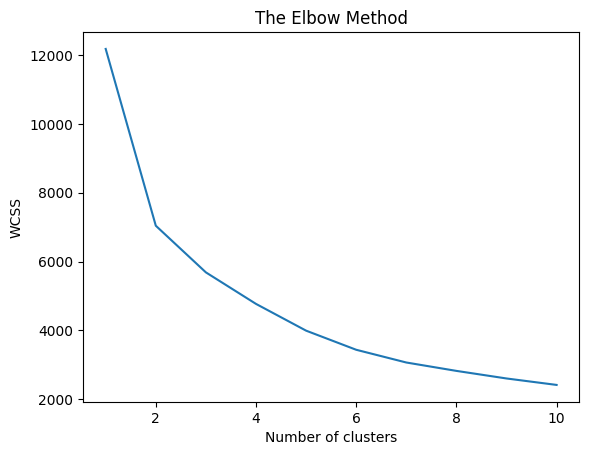

In [130]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [131]:
# through this the value of n_cluster should be 3

In [132]:
km=KMeans(n_clusters=3)
cluster=km.fit_predict(pca_data)
cluster


array([2, 1, 0, ..., 0, 0, 1], dtype=int32)

In [133]:
silhouette_avg = silhouette_score(pca_data,cluster)

In [134]:
silhouette_avg

0.36652212132581447

In [135]:
pca_data['cluster']=cluster

In [136]:
pca_data

,PC1,PC2,PC3,cluster
0,2.570923,2.381351,1.635021,2
1,-1.275347,-1.214572,-0.199185,1
2,1.744409,-0.743021,0.086262,0
3,-1.778356,-0.527054,-1.389633,1
4,0.150620,-1.390959,-0.504682,0
...,...,...,...,...
1983,-1.858469,-0.433273,0.322053,1
1984,0.267657,-1.131109,1.093589,0
1985,1.656815,-0.261512,-0.778436,0
1986,1.649053,-1.549345,-0.628080,0


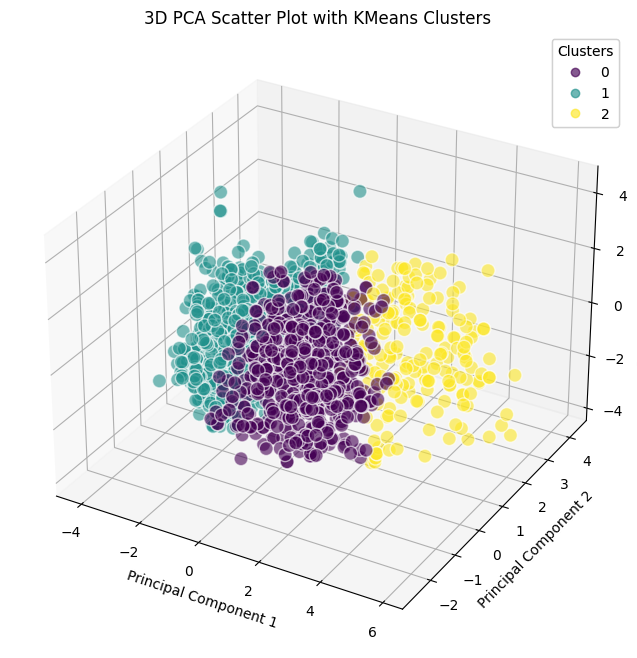

In [138]:
# Plot 3D scatter plot of PCA-transformed data with Kmeans clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot with clusters
scatter = ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['cluster'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Scatter Plot with KMeans Clusters')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

In [195]:
data['cluster']=cluster

In [205]:
data["cluster"].value_counts()

cluster
1    1130
0     659
2     199
Name: count, dtype: int64

In [145]:
scaled_data['Cluster']=cluster

In [146]:
scaled_data

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp,Cluster
0,-0.023796,-0.915888,0.466887,0.300399,0.654528,-0.10081,2.561042,1.029554,-1.363976,1.536621,2.057087,1.469068,-1.380836,-0.416598,2
1,-1.056519,-0.915888,-0.158453,-0.390038,-0.225554,-0.10081,-0.390466,1.288135,-1.363976,-1.404932,-0.892933,-1.072364,1.351969,-0.416598,1
2,-0.450141,-0.915888,1.181357,-0.804301,-0.665595,-0.10081,-0.390466,0.340005,0.733151,0.065845,0.496730,0.934030,-1.380836,-0.416598,0
3,0.179049,-0.915888,-1.202878,-0.804301,0.214487,-0.10081,-0.390466,-1.297673,0.733151,-1.404932,-0.844694,-0.804845,-0.014434,-0.416598,1
4,-0.085451,0.554859,0.475105,1.543187,-0.225554,-0.10081,-0.390466,-1.039092,0.733151,-1.404932,-0.160067,0.666510,-0.014434,-0.416598,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0.854173,-0.915888,-0.790633,1.094403,0.654528,-0.10081,-0.390466,-0.435737,0.733151,0.065845,-0.887367,-1.339884,-0.014434,-0.416598,1
1984,-0.493299,0.554859,0.778443,0.231356,0.654528,-0.10081,-0.390466,1.977683,0.733151,-1.404932,-0.119249,1.067789,2.718371,1.226649,0
1985,0.514453,-0.915888,0.405540,1.439622,0.214487,-0.10081,-0.390466,-1.039092,-1.363976,-1.404932,1.359472,0.666510,-1.380836,1.226649,0
1986,0.811939,0.554859,1.055801,-1.425695,-1.105636,-0.10081,-0.390466,1.115747,0.733151,-1.404932,0.621039,1.201549,-0.014434,-0.416598,0


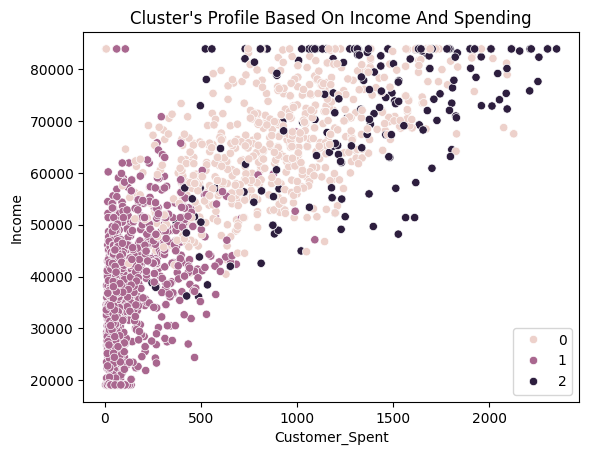

In [199]:
pl = sns.scatterplot(data = data,x=data["Customer_Spent"], y=data["Income"],hue=data["cluster"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [ ]:
from pickle import HIGHEST_PROTOCOL
cluster -0 HIGH INCOME AND HIGH SPENDING
cluster -1 LOW INCOME AND LOW SPENDING
cluster -2 HIGH INCOME AND LOW SPENDING

In [210]:
#Save the modified dataset to a csv file
data.to_csv('final.csv',index=False)
data=pd.read_csv('final.csv')
data

,ID,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,age,Living_With,Years_Since_Registration,Customer_Spent,Total_purcheses,Num_Children,Total_Accept_cmp,Cluster,cluster
0,5524,0,58138.0,58,7,0,1,67,0,12,1617,25,0,0,2,2
1,2174,0,46344.0,38,5,0,0,70,0,10,27,6,2,0,1,1
2,4141,0,71613.0,26,4,0,0,59,1,11,776,21,0,0,0,0
3,6182,0,26646.0,26,6,0,0,40,1,10,53,8,1,0,1,1
4,5324,1,58293.0,94,5,0,0,43,1,10,422,19,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,8372,0,34421.0,81,7,0,0,50,1,11,30,4,1,0,1,1
1984,4001,1,64014.0,56,7,0,0,78,1,10,444,22,3,1,0,0
1985,7270,0,56981.0,91,6,0,0,43,0,10,1241,19,0,1,0,0
1986,8235,1,69245.0,8,3,0,0,68,1,10,843,23,1,0,0,0


In [166]:
#Now as we have labels we can perform supervised learning algorithm for model building

# Model Building

In [148]:
X=scaled_data.drop(['Cluster'],axis=1)
y=scaled_data['Cluster']

In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [150]:
# Logistic regression

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.3f}")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.997
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       1.00      1.00      1.00       242
           2       1.00      1.00      1.00        36

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

[[119   1   0]
 [  0 242   0]
 [  0   0  36]]


In [152]:
# through logistic regression we got accuracy of 100%

In [158]:
# Decision Tree

In [182]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=4,max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.3f}")
print(classification_report(y_test, y_pred_decision_tree))
print(confusion_matrix(y_test, y_pred_decision_tree))

Decision Tree Accuracy: 0.917
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       120
           1       0.93      0.96      0.95       242
           2       0.91      0.83      0.87        36

    accuracy                           0.92       398
   macro avg       0.91      0.88      0.89       398
weighted avg       0.92      0.92      0.92       398

[[102  16   2]
 [  8 233   1]
 [  5   1  30]]


In [179]:
# through Decision tree classifier we got accuracy of 92%

In [166]:
#RandomForestClassifier

In [176]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,
                              max_features=0.6,
                              max_depth=8)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_pred_random_forest)
print(f"Random Forest Accuracy: {random_forest_accuracy:.3f}")
print(classification_report(y_test, y_pred_random_forest))
print(confusion_matrix(y_test, y_pred_random_forest))

Random Forest Accuracy: 0.952
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       120
           1       0.97      0.98      0.97       242
           2       0.91      0.89      0.90        36

    accuracy                           0.95       398
   macro avg       0.94      0.93      0.93       398
weighted avg       0.95      0.95      0.95       398

[[111   7   2]
 [  5 236   1]
 [  3   1  32]]


In [177]:
# got accuracy of 95%

In [169]:
# KNN

In [184]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.3f}")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.937
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       120
           1       0.95      0.98      0.96       242
           2       0.94      0.86      0.90        36

    accuracy                           0.94       398
   macro avg       0.93      0.91      0.92       398
weighted avg       0.94      0.94      0.94       398

[[106  12   2]
 [  6 236   0]
 [  5   0  31]]


In [185]:
# In this we got accuracy of 94%

In [186]:
# Adaboost

In [187]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {adaboost_accuracy:.3f}")
print(classification_report(y_test, y_pred_adaboost))
print(confusion_matrix(y_test, y_pred_adaboost))

AdaBoost Accuracy: 0.942
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       120
           1       0.98      0.96      0.97       242
           2       0.96      0.75      0.84        36

    accuracy                           0.94       398
   macro avg       0.94      0.89      0.91       398
weighted avg       0.95      0.94      0.94       398

[[115   5   0]
 [  8 233   1]
 [  9   0  27]]


In [188]:
# IN this we got accuraccy of 94%

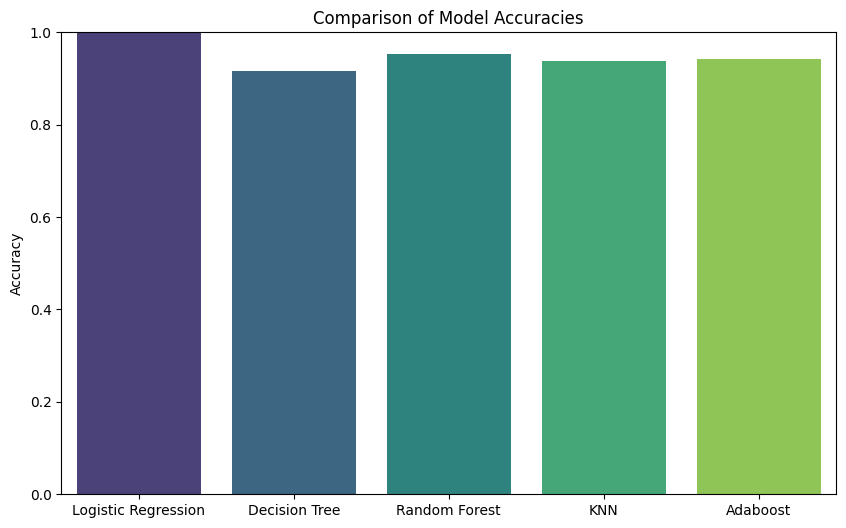

In [189]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest','KNN','Adaboost']
accuracies = [log_reg_accuracy, decision_tree_accuracy, random_forest_accuracy,knn_accuracy,adaboost_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=log_reg, n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)

In [ ]:
# as we can see Logistic Regression but we cant use it as it may be overfitted therefore Im using the second highest model which is Random Forest

# Model Deployment

In [207]:
! pip install streamlit
! pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255314 sha256=582e7c12e60adcd850ec8b2304a6599cc449cfe19af3a4c39694bf6b007a5021
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [208]:
import pickle5

In [209]:
# Save the trained model using pickle5
model_filename = 'random_forest_classifier.pkl'
with open(model_filename, 'wb') as file:
    pickle5.dump(random_forest, file)